# PROJECT INTRODUCTION

Apologies in advance if you are craving chocolate after reading this case 🍫

### DATASET

The following project deals with a dataset about chocolate customer ratings. <br> <br>
You can find this dataset here https://www.kaggle.com/datasets/joebeachcapital/chocolate-ratings <br>

Here are the information about the dataset : <br>
- **ref** : Reference ID.
- **company_manufacturer** : Manufacturer name.
- **company_location** : Manufacturer region.
- **review_date** : Review date (year).
- **country_of_bean_origin** : Country of origin.
- **specific_bean_origin_or_bar_name** : Specific bean or bar name.
- **cocoa_percent** : Cocoa percent (% chocolate).
- **ingredients** : Ingredients, ("#" = represents the number of ingredients in the chocolate; B = Beans, S = Sugar, S* = Sweetener other than white cane or beet sugar, C = Cocoa Butter, V = Vanilla, L = Lecithin, Sa = Salt).
- **most_memorable_characteristics** : Summary review of the most memorable characteristics of that bar. 
- **rating** : rating between 1-5.

### PURPOSE OF THIS ANALYSIS

The aim of the analysis is to grasp the worldwide landscape of chocolate production and identify the primary factors that contribute to customer preferences.

# LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# 1 - DATA PREPARATION

## 1.1 - Data import

In [2]:
#Let's call 'df' our dataframe
df = pd.read_csv("/kaggle/input/chocolate-ratings/chocolate.csv")

## 1.2 - Data information

### Head of the data

In [3]:
#Head of the data
df.head()

,ref,company_manufacturer,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
3,2542,5150,U.S.A.,2021,Fiji,"Matasawalevu, batch 1",68%,"3- B,S,C","chewy, off, rubbery",3.00
4,2546,5150,U.S.A.,2021,Venezuela,"Sur del Lago, batch 1",72%,"3- B,S,C","fatty, earthy, moss, nutty,chalky",3.00


### Information about the dataset (NA, Columns type, Columns name...)

In [4]:
#Shape of the data (number of rows, number of columns) 
df.shape

(2530, 10)

In [5]:
#Information about each columns (name, null values, format)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2530 entries, 0 to 2529
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ref                               2530 non-null   int64  
 1   company_manufacturer              2530 non-null   object 
 2   company_location                  2530 non-null   object 
 3   review_date                       2530 non-null   int64  
 4   country_of_bean_origin            2530 non-null   object 
 5   specific_bean_origin_or_bar_name  2530 non-null   object 
 6   cocoa_percent                     2530 non-null   object 
 7   ingredients                       2443 non-null   object 
 8   most_memorable_characteristics    2530 non-null   object 
 9   rating                            2530 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 197.8+ KB


## 1.3 - Data cleaning

### DROPPING COLUMNS

In [6]:
#Drop of 4 columns we don't need for the following analysis.
df = df.drop(columns=['ingredients', 'most_memorable_characteristics', 'company_manufacturer', 'specific_bean_origin_or_bar_name'])

### NAMING COLUMNS

In [9]:
#Modification of one column name
new_df_names = {"country_of_bean_origin": "bean_origin"}
df = df.rename(columns=new_df_names)

### VALUES OF COLUMNS

In [10]:
#Column company_location check
unique_company_location = df.company_location.unique()
print(unique_company_location)

['U.S.A.' 'France' 'Fiji' 'Vanuatu' 'Ecuador' 'Mexico' 'U.K.'
 'Netherlands' 'Spain' 'Russia' 'Peru' 'Canada' 'Italy' 'Brazil'
 'Nicaragua' 'Australia' 'Philippines' 'Wales' 'Belgium' 'Vietnam'
 'Germany' 'Singapore' 'Switzerland' 'Venezuela' 'Malaysia' 'South Korea'
 'Taiwan' 'Puerto Rico' 'Colombia' 'Japan' 'New Zealand' 'Costa Rica'
 'Hungary' 'Amsterdam' 'Scotland' 'Martinique' 'Sao Tome' 'St. Lucia'
 'Argentina' 'Guatemala' 'South Africa' 'Dominican Republic'
 'Sao Tome & Principe' 'Bolivia' 'Portugal' 'Norway' 'Denmark' 'Grenada'
 'Israel' 'India' 'St.Vincent-Grenadines' 'Czech Republic' 'Thailand'
 'Finland' 'Madagascar' 'Sweden' 'Poland' 'Austria' 'Honduras' 'U.A.E.'
 'Lithuania' 'Ireland' 'Chile' 'Ghana' 'Iceland' 'Suriname' 'El Salvador']


In [11]:
#Column review_date check
unique_review_date = df.review_date.unique()
print(unique_review_date)

[2019 2021 2012 2013 2014 2015 2016 2018 2020 2011 2009 2010 2017 2007
 2008 2006]


In [12]:
#Column bean_origin check
unique_bean_origin = df.bean_origin.unique()
print(unique_bean_origin)

['Tanzania' 'Dominican Republic' 'Madagascar' 'Fiji' 'Venezuela' 'Uganda'
 'India' 'Bolivia' 'Peru' 'Panama' 'Colombia' 'Burma' 'Brazil'
 'Papua New Guinea' 'Ecuador' 'Cuba' 'Togo' 'Sao Tome' 'Mexico' 'Vanuatu'
 'Indonesia' 'Trinidad' 'Vietnam' 'Nicaragua' 'Ghana' 'Belize' 'Blend'
 'Jamaica' 'Grenada' 'Guatemala' 'Honduras' 'Costa Rica' 'Haiti' 'Congo'
 'Philippines' 'Solomon Islands' 'Malaysia' 'Sri Lanka' 'Ivory Coast'
 'Gabon' 'Taiwan' 'Puerto Rico' 'Martinique' 'St. Lucia' 'Australia'
 'Liberia' 'Sierra Leone' 'U.S.A.' 'Nigeria' 'St.Vincent-Grenadines'
 'Thailand' 'Tobago' 'Sao Tome & Principe' 'Sumatra' 'El Salvador'
 'Cameroon' 'Samoa' 'China' 'Principe' 'Sulawesi' 'Suriname' 'DR Congo']


In [14]:
#Modification of column bean_origin
df.loc[df['bean_origin'] == 'DR Congo', 'bean_origin'] = 'Congo'
df.loc[df['bean_origin'] == 'St.Vincent-Grenadines', 'bean_origin'] = 'St. Vincent-Grenadines'

In [15]:
#Column cocoa_percent check
unique_cocoa_percent = df.cocoa_percent.unique()
print(unique_cocoa_percent)

['76%' '68%' '72%' '80%' '70%' '63%' '74%' '60%' '88%' '55%' '75%' '65%'
 '85%' '73%' '64%' '66%' '50%' '100%' '77%' '82%' '90%' '71%' '83%' '78%'
 '86%' '62%' '69%' '91%' '67%' '42%' '61%' '73.5%' '79%' '58%' '71.50%'
 '60.5%' '81%' '57%' '72.5%' '56%' '46%' '89%' '99%' '84%' '53%' '87%']


In [16]:
#Modification of column cocoa_percent

# Delete the '%' from each row
df['cocoa_percent'] = df['cocoa_percent'].str.replace('%','')

# Convert the 'cocoa_percent' column to float
df['cocoa_percent'] = df['cocoa_percent'].astype(float)

# Round the 'cocoa_percent' column
df['cocoa_percent'] = df['cocoa_percent'].round()

# Convert the 'cocoa_percent' column to int
df['cocoa_percent'] = df['cocoa_percent'].astype(int)

In [17]:
#Column rating
unique_rating = df.rating.unique()
print(unique_rating)

[3.25 3.5  3.75 3.   2.75 4.   2.5  1.75 2.25 1.5  2.   1.  ]


### RESULT OF DATA PREPARATION

In [62]:
#Head of new data 
df.head()

,ref,company_location,review_date,bean_origin,cocoa_percent,rating
0,2454,U.S.A.,2019,Tanzania,76,3.25
1,2458,U.S.A.,2019,Dominican Republic,76,3.50
2,2454,U.S.A.,2019,Madagascar,76,3.75
3,2542,U.S.A.,2021,Fiji,68,3.00
4,2546,U.S.A.,2021,Venezuela,72,3.00


# 2 - EXPLORATORY DATA ANALYSIS (EDA)

## 2.1 - Which country produces the most of chocolate ?

### DATAFRAME

In [63]:
#Count of rows group by location
count_by_location = df['company_location'].value_counts()

#Selection of the top 10
count_by_location = count_by_location.head(10)

#Print
print(count_by_location)

company_location
U.S.A.         1136
Canada          177
France          176
U.K.            133
Italy            78
Belgium          63
Ecuador          58
Australia        53
Switzerland      44
Germany          42
Name: count, dtype: int64


### CHART

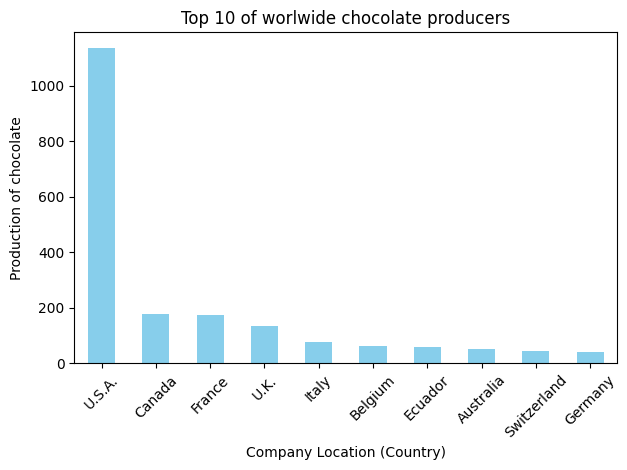

In [68]:
#Using the dataframe we have created above
count_by_location.plot(kind='bar', color='skyblue')

#Labels and title
plt.title('Top 10 of worlwide chocolate producers')
plt.xlabel('Company Location (Country)')
plt.ylabel('Production of chocolate')

#Rotation on x-axis to be able to read countries properly
plt.xticks(rotation=45)  

#Display
plt.tight_layout()  
plt.show()

### CONCLUSION

To conclude, **the U.S.A. is the biggest producer of chocolate**, followed by Canada and France.

## 2.2 - Where are produced the best cocoa beans ?



### DATAFRAME

In [69]:
#Mean, Standard deviation, count of reviews group by bean_origin
stats_by_beans_country = df.groupby('bean_origin').agg({'rating': ['mean', 'std'], 'ref': 'size'})

#Renaming columns
stats_by_beans_country.columns = ['mean_rating', 'std_rating', 'nb_reviews']

#Sorting by mean rating in descending order
stats_by_beans_country = stats_by_beans_country.sort_values(by='mean_rating', ascending=False)

#Selection of the top 10
stats_by_beans_country = stats_by_beans_country.head(10)

#Print 
print(stats_by_beans_country)

                     mean_rating  std_rating  nb_reviews
bean_origin                                             
Tobago                  3.625000    0.530330           2
China                   3.500000         NaN           1
Sao Tome & Principe     3.500000    0.000000           2
Solomon Islands         3.450000    0.307318          10
Thailand                3.300000    0.410792           5
Congo                   3.291667    0.316826          12
Cuba                    3.291667    0.410561          12
Vietnam                 3.287671    0.313668          73
Papua New Guinea        3.280000    0.376748          50
Madagascar              3.266949    0.387659         177


### CHART

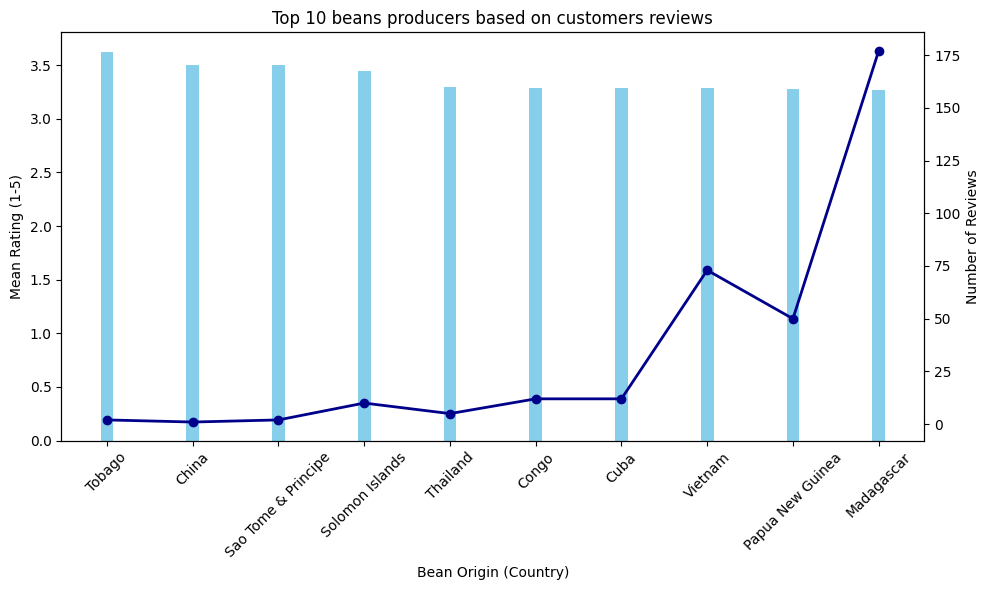

In [85]:
#Using the dataframe we have created above, without standard deviation (which is equalt to NaN sometimes)
beans_country = stats_by_beans_country.index
beans_rating = stats_by_beans_country['mean_rating']
reviews_count = stats_by_beans_country['nb_reviews']

#Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))
bars = ax1.bar(beans_country, beans_rating, color='skyblue', width=0.15)

#Title and labels
plt.title('Top 10 beans producers based on customers reviews')
ax1.set_ylabel('Mean Rating (1-5)')
ax1.set_xlabel('Bean Origin (Country)')
plt.xticks(rotation=45)

#Creating a twin axis for reviews count
ax2 = ax1.twinx()
ax2.plot(beans_country, reviews_count, color='darkblue', marker='o', linestyle='-', linewidth=2.0)
ax2.set_ylabel('Number of Reviews')

#Display
plt.tight_layout()
plt.show()

Anotations: As we have NaN standard deviation in this case, we are using the number of rating variable to put these results in perspective.

### CONCLUSION 

It's quite difficult to conclude here. As we can see in the previous histogram, Tobago seems to be the best beans producer. However as we can see in the previous table, Tobago as received only 2 reviews, and China only 1 (which set the standard deviation to NaN). <br> <br> So we should take this in consideration to choose our beans producer. Countries like Vietnam, Madagascar or Papua New Guinea are more trustable because they have a quite good rating and a lot of reviews.

## 2.3 - What is the ideal cocoa percentage for customer-favorite chocolate?

### DATAFRAME

In [60]:
#Grouping by 'rating' and calculating mean, standard deviation and number of reviews of 'cocoa_percent'
stats_by_rating = df.groupby('rating').agg({'cocoa_percent': ['mean', 'std'], 'ref': 'size'})

#Renaming columns
stats_by_rating.columns = ['mean_cocoa_percent', 'std_cocoa_percent', 'num_reviews']

#Print
print(stats_by_rating)

        mean_cocoa_percent  std_cocoa_percent  num_reviews
rating                                                    
1.00             78.250000          14.568802            4
1.50             84.800000          15.310127           10
1.75             90.666667          16.165808            3
2.00             76.575758          11.696769           33
2.25             73.294118           9.095086           17
2.50             71.668675           6.360283          166
2.75             72.099099           6.545423          333
3.00             71.736138           5.685160          523
3.25             71.431034           5.115046          464
3.50             71.226549           4.487374          565
3.75             71.043333           3.695987          300
4.00             70.696429           3.368747          112


### CHART

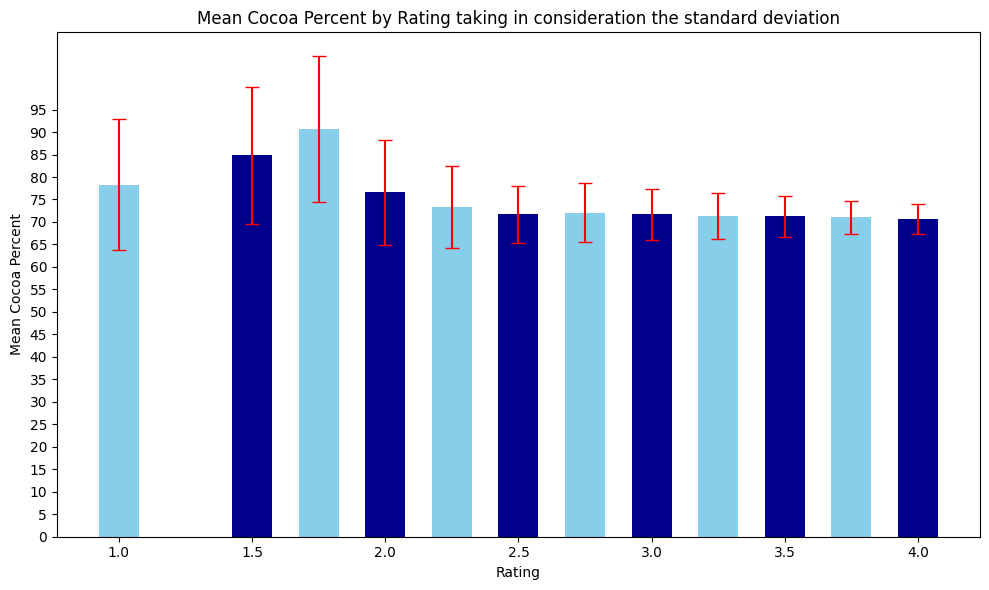

In [86]:
#Keeping ratings, mean cocoa percent, and standard deviation.
ratings = stats_by_rating.index
mean_cocoa_percent = stats_by_rating['mean_cocoa_percent']
std_cocoa_percent = stats_by_rating['std_cocoa_percent']

#Colors
colors = ['skyblue', 'darkblue'] * (len(ratings) // 2)

#Display settings
plt.figure(figsize=(10, 6))
bars = plt.bar(ratings, mean_cocoa_percent, color=colors, width=0.15)  

#Standard deviation
plt.errorbar(ratings, mean_cocoa_percent, yerr=std_cocoa_percent, fmt='none', ecolor='red', capsize=5)

#Labels and title
plt.xlabel('Rating')
plt.ylabel('Mean Cocoa Percent')
plt.title('Mean Cocoa Percent by Rating taking in consideration the standard deviation')

#Y-axis has to be accurate
plt.yticks(np.arange(0, max(mean_cocoa_percent) + 5, 5))  # Adjust the range and interval as needed

#Displaying the plot
plt.tight_layout()
plt.show()

### CONCLUSION
Due to the presence of standard deviation, drawing conclusions might seem intricate. Nevertheless, in this instance, we observe that the standard deviation is minimal for the highest rating. Hence, it's straightforward to deduce that a **cocoa content of 71% (rounded up to 70.69)** is ideal for creating a chocolate likely to be adored by customers.

# CONCLUSION OF THE STUDY

Here is the conclusion of the previous study : 
- The U.S.A is the biggest producer of chocolate.
- Vietnam, Papua New Guinea and Madagascar are the best beans producers.
- If your strategy is to produce a chocolate like by most of the population, focus on 71% cocoa.

<br>
Thank you !